In [2]:
!pip install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [25]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
!cd yolov5

In [1]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-6 Python-3.12.0 torch-2.3.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [11]:
result = model('https://imgs.search.brave.com/yLYpdwvUlRVuBFlVJpiQXQL9pF30ZzLOCDUdPSRko-E/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvNjQ3/NjcyMTM0L3Bob3Rv/L2Zvb3RiYWxsLXBs/YXllcnMtcGxheWlu/Zy1mb290YmFsbC5q/cGc_cz02MTJ4NjEy/Jnc9MCZrPTIwJmM9/NVR6eUMwVjZCQ01W/TEJuRXNISWExVzYx/OWZNZUM0VmRzazZG/c3lEemkxZz0')

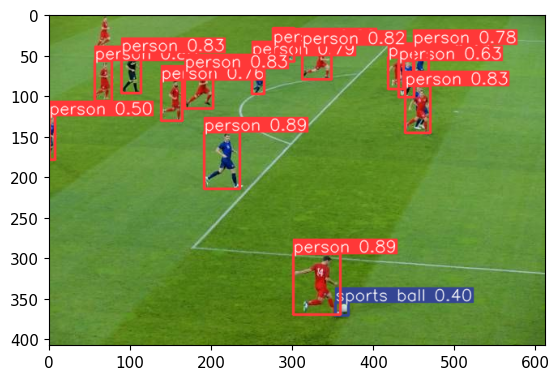

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [7]:
np.squeeze(result.render()).shape

(533, 800, 3)

In [32]:
  cap.release()

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid 
import os 
import time 

In [7]:
IMAGES_PATH = 'C:/Users/admin/Documents/Studies/Projects/ML/Drowsiness_Detection/yolov5/data/images' #/data/images
labels = ['drowsy']
number_imgs = 3
IMAGES_PATH

'C:/Users/admin/Documents/Studies/Projects/ML/Drowsiness_Detection/yolov5/data/images'

In [9]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [5]:
!cd yolov5
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

The system cannot find the path specified.


In [15]:
!cd yolov5

In [16]:
pwd

'C:\\Users\\admin\\Documents\\Studies\\Projects\\ML\\Drowsiness_Detection'

In [28]:
!cd

C:\Users\admin


In [7]:
!cd labelImg

In [29]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

^C


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-318-gc0380fd8 Python-3.12.0 torch-2.3.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/admin/Documents/Studies/Projects/ML/Drowsiness_Detection/yolov5/runs/train/exp13/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\admin/.cache\torch\hub\master.zip
YOLOv5  2024-6-17 Python-3.12.0 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
img = os.path('C:/Users/admin/Documents/Studies/Projects/ML/Drowsiness_Detection/yolov5/data/images/awake.1a1ab524-22a1-11ef-b3ac-04bf1b20d7d6')

TypeError: 'module' object is not callable

In [25]:
img

NameError: name 'img' is not defined

In [11]:
results = model("C:/Users/admin/Documents/Studies/Projects/ML/Drowsiness_Detection/yolov5/data/images/drowsy.921aed4b-264f-11ef-bc92-04bf1b20d7d6.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Documents\\Studies\\Projects\\ML\\Drowsiness_Detection\\yolov5\\data\\images\\drowsy.921aed4b-264f-11ef-bc92-04bf1b20d7d6.jpg'

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('Drowsiness Detection', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
results

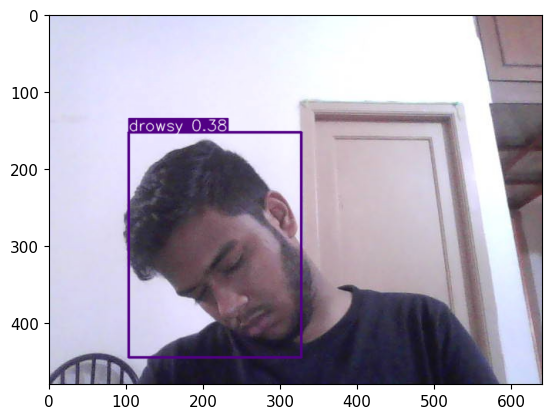

In [30]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [31]:
result = model("C:/Users/admin/Documents/Studies/Projects/ML/Drowsiness_Detection/yolov5/data/images/awake.fd18ccc2-264e-11ef-8bd3-04bf1b20d7d6.jpg")

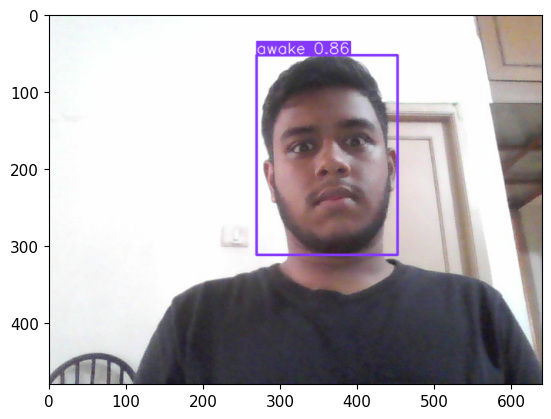

In [32]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()